In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df1 = pd.read_csv('Case Study - Customer.csv', delimiter = ';')
df2 = pd.read_csv('Case Study - Product.csv', delimiter = ';')
df3 = pd.read_csv('Case Study - Store.csv', delimiter = ';')
df4 = pd.read_csv('Case Study - Transaction.csv', delimiter = ';')
print(df4.head())
print(df1.head())

  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  
   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57


In [4]:
df = df4.merge(df1, on='CustomerID').merge(df2, on='ProductID').merge(df3, on='StoreID')
df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,01/08/2022,P4,12000,3,36000,4,23,1,Single,"7,5",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5016,TR21587,425,17/10/2022,P4,12000,1,12000,4,58,1,Married,"7,22",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5017,TR51183,409,19/07/2022,P4,12000,1,12000,4,47,0,Married,"28,23",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
5018,TR14963,374,16/12/2022,P4,12000,5,60000,4,32,0,Single,"5,4",Potato Chip,12000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  Product Name    5020 non-null   object
 13  Price_y         5020 non-null   int64 
 14  StoreName       5020 non-null   object
 15  GroupStore      5020 non-null   object
 16  Type            5020 non-null   object
 17  Latitude        5020 non-null   object
 18  Longitud

In [6]:
# basen on SQL Query
def umur(x):
    if x < 30:
        return 'Single'
    else:
        return 'Married'

df['marital2'] = df['Age'].apply(umur)
#isi nan di kolom marital status
df['Marital Status'] = df['Marital Status'].fillna(df['marital2'])
df.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
Price_y           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
marital2          0
dtype: int64

In [7]:
df = df.drop(columns=['Latitude', 'Longitude', 'Price_y', 'marital2'], axis = 1)
df.columns

Index(['TransactionID', 'CustomerID', 'Date', 'ProductID', 'Price_x', 'Qty',
       'TotalAmount', 'StoreID', 'Age', 'Gender', 'Marital Status', 'Income',
       'Product Name', 'StoreName', 'GroupStore', 'Type'],
      dtype='object')

In [8]:
groupT = df.groupby(['Date'])['TotalAmount'].sum().reset_index()#.sort_values('Date', ascending = False)
groupT

,Date,TotalAmount
0,01/01/2022,431200
1,01/02/2022,317300
2,01/03/2022,544500
3,01/04/2022,921400
4,01/05/2022,476400
...,...,...
360,31/05/2022,185600
361,31/07/2022,605700
362,31/08/2022,291600
363,31/10/2022,598900


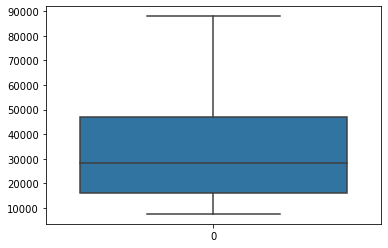

In [9]:
ax = sns.boxplot(data = df['TotalAmount'])

In [10]:
# Mengubah kolom Date menjadi tipe data datetime dengan format yang sesuai
groupT['Date'] = pd.to_datetime(groupT['Date'], format='%d/%m/%Y')

# Urutkan DataFrame berdasarkan tanggal
groupT.sort_values(by='Date', inplace=True)

In [11]:
groupT.head(30)

,Date,TotalAmount
0,2022-01-01,431200
12,2022-01-02,613600
24,2022-01-03,561300
36,2022-01-04,396500
48,2022-01-05,273400
60,2022-01-06,452600
72,2022-01-07,272200
84,2022-01-08,442100
96,2022-01-09,341200
108,2022-01-10,537900


Text(0, 0.5, 'Total Amount')

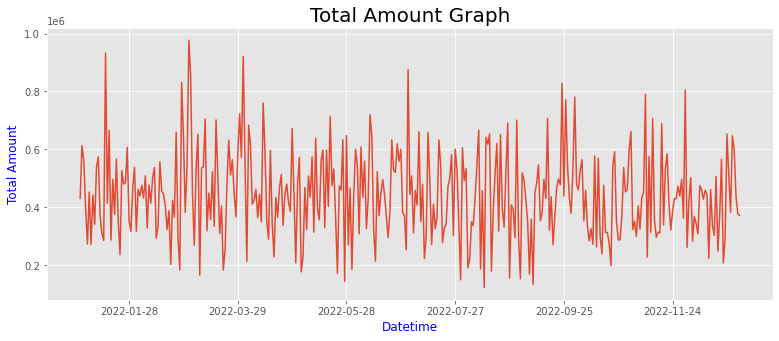

In [12]:
#ine chart example
#import matplotlib.ticker as plticker

plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(groupT['Date'], groupT['TotalAmount'], linewidth=1.5)
plt.title('Total Amount Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(60)) #mengubah interval xticks to 2 years interval
plt.xlabel('Datetime', color = 'b')
plt.ylabel('Total Amount', color = 'b')

In [13]:
# Menambahkan kolom DayOfYear yang merepresentasikan urutan harian dalam setahun
groupT['DayOfYear'] = groupT['Date'].dt.dayofyear
groupT['Day'] = groupT['Date'].dt.day
groupT

,Date,TotalAmount,DayOfYear,Day
0,2022-01-01,431200,1,1
12,2022-01-02,613600,2,2
24,2022-01-03,561300,3,3
36,2022-01-04,396500,4,4
48,2022-01-05,273400,5,5
...,...,...,...,...
323,2022-12-27,647300,361,27
335,2022-12-28,599000,362,28
346,2022-12-29,437900,363,29
357,2022-12-30,377000,364,30


In [14]:
# Menghasilkan nomor minggu menggunakan dt.week
groupT['weeknum'] = groupT['Date'].dt.week
groupT

C:\Users\USER\AppData\Local\Temp\ipykernel_5564\774100084.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  groupT['weeknum'] = groupT['Date'].dt.week


,Date,TotalAmount,DayOfYear,Day,weeknum
0,2022-01-01,431200,1,1,52
12,2022-01-02,613600,2,2,52
24,2022-01-03,561300,3,3,1
36,2022-01-04,396500,4,4,1
48,2022-01-05,273400,5,5,1
...,...,...,...,...,...
323,2022-12-27,647300,361,27,52
335,2022-12-28,599000,362,28,52
346,2022-12-29,437900,363,29,52
357,2022-12-30,377000,364,30,52


In [15]:
groupT = groupT[~groupT['DayOfYear'].isin([1, 2])]

In [16]:
groupw = groupT.groupby(['weeknum'])['TotalAmount'].sum().reset_index()
groupw['Year'] = 2022

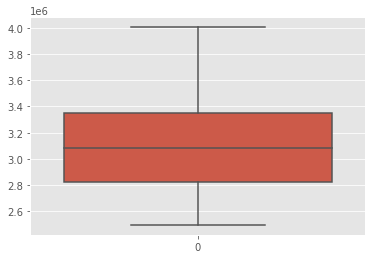

In [17]:
ax = sns.boxplot(data = groupw['TotalAmount'])

no outlier

In [18]:
groupw['Date'] = pd.to_datetime(groupw['Year'].astype(str) + groupw['weeknum'].astype(str) + '1', format='%G%V%u')
groupw

,weeknum,TotalAmount,Year,Date
0,1,2739300,2022,2022-01-03
1,2,3424600,2022,2022-01-10
2,3,2985100,2022,2022-01-17
3,4,3233600,2022,2022-01-24
4,5,3174800,2022,2022-01-31
5,6,2888400,2022,2022-02-07
6,7,2777600,2022,2022-02-14
7,8,3409800,2022,2022-02-21
8,9,4005100,2022,2022-02-28
9,10,3368800,2022,2022-03-07


In [19]:
groupw = groupw[['weeknum', 'TotalAmount']]

In [20]:
#stationer or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(groupw['TotalAmount'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.854452
p-value: 0.000000
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598


In [26]:
groupw['TotalAmount'] = groupw['TotalAmount'].astype('float')

C:\Users\USER\AppData\Local\Temp\ipykernel_5564\2060261221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupw['TotalAmount'] = groupw['TotalAmount'].astype('float')


In [27]:
train = groupw[['weeknum', 'TotalAmount']].iloc[:-12]
test = groupw[['weeknum', 'TotalAmount']].iloc[-12:]
train.head()

train.columns

Index(['weeknum', 'TotalAmount'], dtype='object')

In [28]:
groupw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weeknum      52 non-null     int64  
 1   TotalAmount  52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


Text(0, 0.5, 'Total Amount')

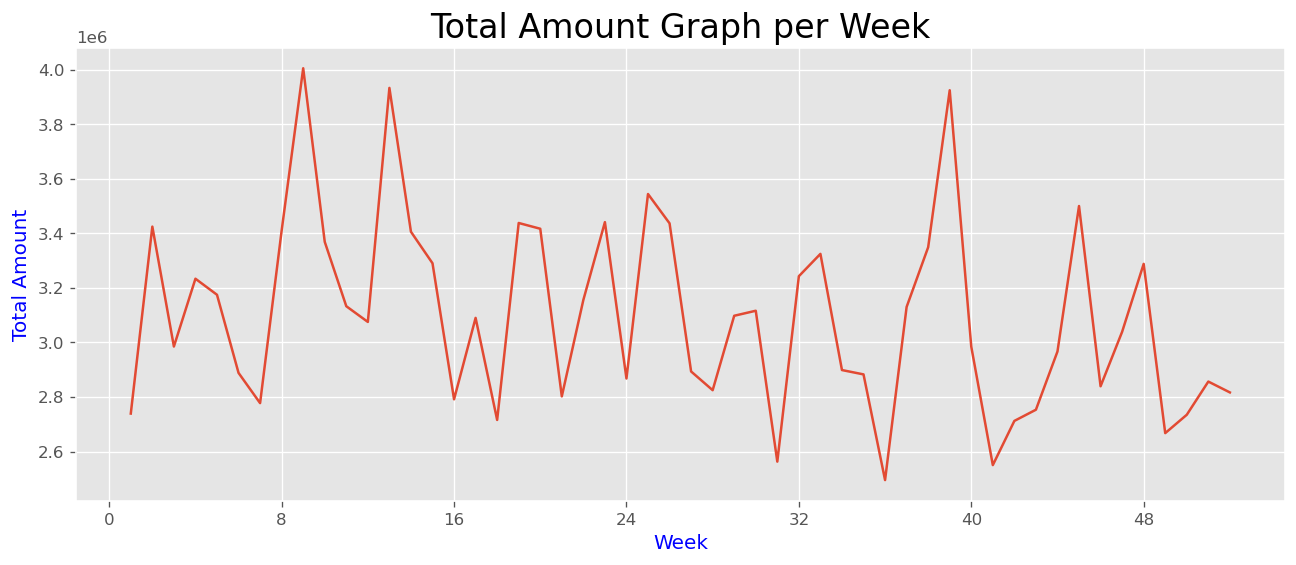

In [479]:
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(groupw['weeknum'], groupw['TotalAmount'], linewidth=1.5)
plt.title('Total Amount Graph per Week', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(8)) #mengubah interval xticks to 2 years interval
plt.xlabel('Week', color = 'b')
plt.ylabel('Total Amount', color = 'b')

seasonal = 8, karena umumnya memiliki kenaikan 2x - 3x selama 8 minggu.

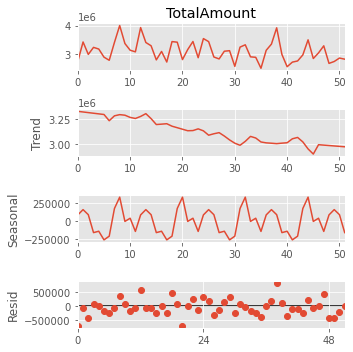

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=groupw['TotalAmount'], model='additive', extrapolate_trend='freq', period=12)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(24))
plt.show()

seasonal = 4, tapi mari kita buat menjadi 8

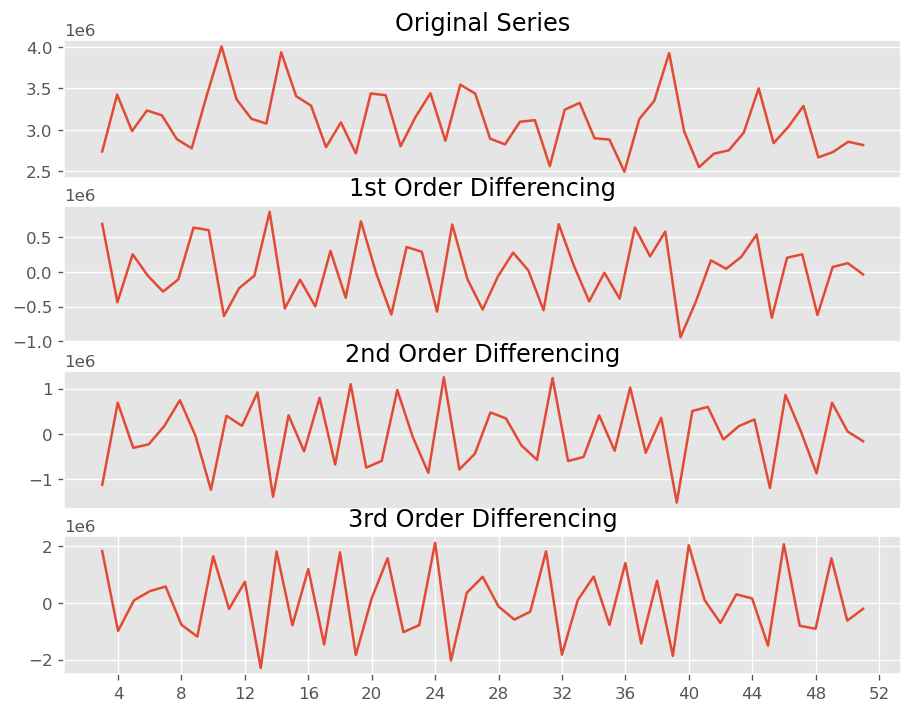

In [43]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(groupw['TotalAmount']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(groupw['TotalAmount'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(groupw['TotalAmount'].diff().diff()); ax3.set_title('2nd Order Differencing'); ax3.axes.xaxis.set_visible(False)
# 3rd Differencing
ax4.plot(groupw['TotalAmount'].diff().diff().diff()); ax4.set_title('3rd Order Differencing')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))
plt.show()

In [51]:
#stationer or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(groupw['TotalAmount'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.854452
p-value: 0.000000
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598


data is stationer if p-value < 0.05

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


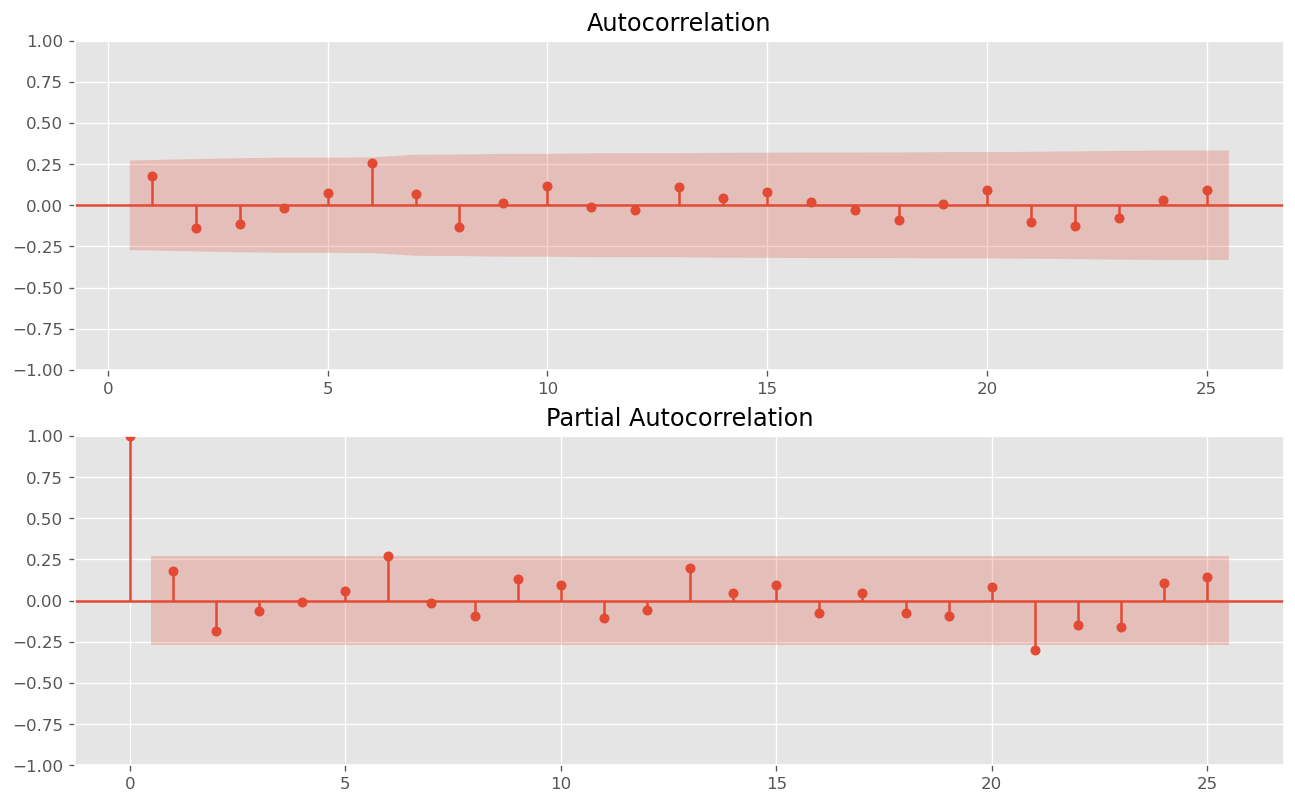

In [100]:
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def acf_pacf(groupw,alags=26,plags=26):
    '''
        Performs acf/pacf results plot

        df          Dataframe to Analyse
    '''

    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    #Make ACF plot
    plot_acf(groupw['TotalAmount'],lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(groupw['TotalAmount'],lags=plags, ax=ax2)
    plt.show()

acf_pacf(groupw,alags=25,plags=25)

p = 0, q = 1, s = 8?

In [54]:
groupw.columns

Index(['weeknum', 'TotalAmount'], dtype='object')

In [56]:
train = groupw[['weeknum', 'TotalAmount']].iloc[:-12]
test = groupw[['weeknum', 'TotalAmount']].iloc[-12:]
test

,weeknum,TotalAmount
40,41,2550400.0
41,42,2712400.0
42,43,2753400.0
43,44,2966800.0
44,45,3500100.0
45,46,2839400.0
46,47,3039000.0
47,48,3288000.0
48,49,2667600.0
49,50,2734900.0


In [57]:
train.set_index('weeknum', inplace=True)
test.set_index('weeknum', inplace=True)
test

,TotalAmount
weeknum,
41,2550400.0
42,2712400.0
43,2753400.0
44,2966800.0
45,3500100.0
46,2839400.0
47,3039000.0
48,3288000.0
49,2667600.0


In [471]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['TotalAmount'], order = (1, 0, 0), seasonal_order=(1, 1, 0, 8))
#this is the best period i've us
sarima = model.fit()
sarima.summary()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       TotalAmount   No. Observations:                   40
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 8)   Log Likelihood                -467.727
Date:                           Sun, 03 Sep 2023   AIC                            941.453
Time:                                   05:53:02   BIC                            945.851
Sample:                                        0   HQIC                           942.911
                                            - 40                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3313      0.161      2.052      0.040       0.015       0.648
ar.S.L8       -0.1028      0.098     -1.052      0.293      -0.294       0.089
sigma2      2.936e+11   9.13e-15   3.21e+25      0.000    2.94e+11    2.94e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.59   Prob(JB):                         0.87
Heteroskedasticity (H):               1.13   Skew:                            -0.06
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.29e+42. Standard errors may be unstable.
"""

In [190]:
len(train)

40

In [195]:
train.tail(2)

,TotalAmount
weeknum,
39,3924500.0
40,2984700.0


In [191]:
len(test)

12

In [194]:
test.head(3)

,TotalAmount
weeknum,
41,2550400.0
42,2712400.0
43,2753400.0


In [472]:
start = len(train)+1
end = len(train)+len(test)

predict = sarima.predict(start = start, end = end, dynamic = False, type='level')
predict.reset_index()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,index,predicted_mean
0,41,2.930000e+06
1,42,2.876017e+06
2,43,2.526735e+06
3,44,3.125903e+06
4,45,3.324773e+06
5,46,3.784423e+06
6,47,3.011206e+06
7,48,3.279673e+06
8,49,2.926789e+06
9,50,2.876723e+06


<AxesSubplot:xlabel='weeknum'>

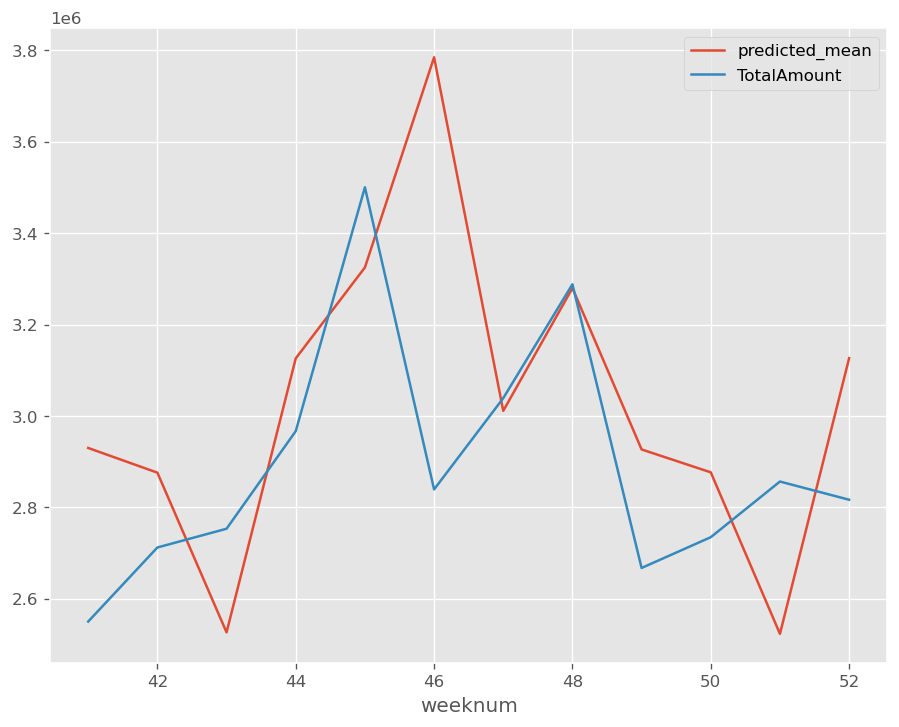

In [473]:
predict.plot(legend = True)
test['TotalAmount'].plot(legend = True)

In [474]:
from sklearn.metrics import mean_absolute_error as mae
import numpy as np

print(mae(test, predict))

""" Have tried many models, and this is the best model """

260756.5937216274


' Have tried many models, and this is the best model '

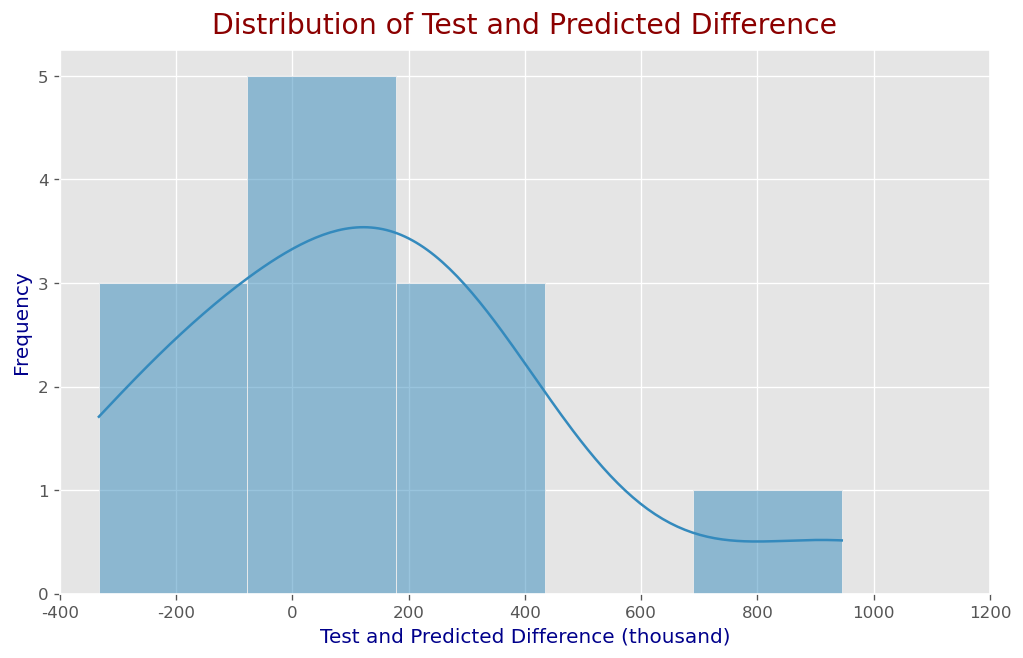

In [475]:
# Hitung selisih antara y_train_scaled dan y_pred_scaled
residuals = predict - test['TotalAmount']

# Plot histogram atau KDE dari selisih (residuals)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Test and Predicted Difference (thousand)', color = 'darkblue', fontsize = 12)
plt.ylabel('Frequency', color = 'darkblue', fontsize = 12)
xtick_label, location = plt.xticks()
new_xtick_labels = (xtick_label / 1000).astype(int)  # Mengubah skala menjadi jutaan dan integer
plt.xticks(xtick_label, new_xtick_labels, rotation=0)
plt.title('Distribution of Test and Predicted Difference', pad = 10, color = 'darkred', fontsize = 17)
#plt.savefig('Distribution_of_Residuals_by_Linear_Regression_Model_in_East_Jakarta.jpg', bbox_inches='tight')
plt.show()

# Predict next 7 week

In [511]:
model2 = SARIMAX(groupw['TotalAmount'], order = (1, 0, 0), seasonal_order=(1, 1, 0, 8))
#this is the best period i've us
sarima2 = model2.fit()
sarima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       TotalAmount   No. Observations:                   52
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 8)   Log Likelihood                -639.968
Date:                           Sun, 03 Sep 2023   AIC                           1285.936
Time:                                   06:11:33   BIC                           1291.288
Sample:                                        0   HQIC                          1287.921
                                            - 52                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3888      0.146      2.663      0.008       0.103       0.675
ar.S.L8       -0.1622      0.093     -1.751      0.080      -0.344       0.019
sigma2       2.61e+11   2.08e-14   1.26e+25      0.000    2.61e+11    2.61e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.84   Prob(JB):                         0.92
Heteroskedasticity (H):               0.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.5e+41. Standard errors may be unstable.
"""

In [528]:
start = len(train)+len(test)+1
end = start + 11

predict2 = sarima2.predict(start = start, end = end, dynamic = False, type='level')
predict2 = predict2.reset_index()

In [524]:
predict2.columns

Index(['index', 'predicted_mean'], dtype='object')

Text(0, 0.5, 'Total Amount')

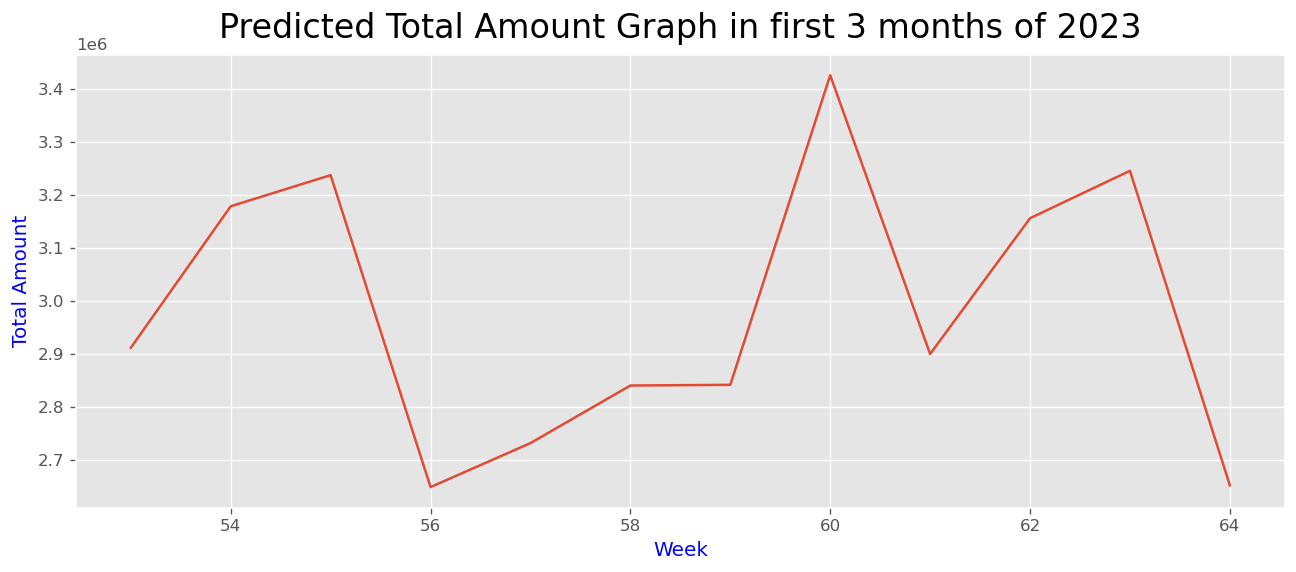

In [529]:
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(predict2['index'], predict2['predicted_mean'], linewidth=1.5)
plt.title('Predicted Total Amount Graph in first 3 months of 2023', fontsize = 20, pad = 10)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2)) #mengubah interval xticks to 2 years interval
plt.xlabel('Week', color = 'b')
plt.ylabel('Total Amount', color = 'b')